In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 1000)

In [3]:
train = pd.read_csv('/content/drive/MyDrive/CDAC_FinalProject/Data/dataset/Kaggle_Training_Dataset_v2.csv',sep=',')
test = pd.read_csv('/content/drive/MyDrive/CDAC_FinalProject/Data/dataset/Kaggle_Test_Dataset_v2.csv',sep=',')

<ipython-input-3-166251ccc04b>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/CDAC_FinalProject/Data/dataset/Kaggle_Training_Dataset_v2.csv',sep=',')
<ipython-input-3-166251ccc04b>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('/content/drive/MyDrive/CDAC_FinalProject/Data/dataset/Kaggle_Test_Dataset_v2.csv',sep=',')


In [4]:
train = train[:-1]
test = test[:-1]

In [5]:
print("The training data shape =",train.shape ,". The test data shape =", test.shape)

The training data shape = (1687860, 23) . The test data shape = (242075, 23)


In [6]:
# concating train and test data.
df=pd.concat([train,test])
print("The final shape of the data is =",df.shape)

The final shape of the data is = (1929935, 23)


In [7]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [8]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1929935 entries, 0 to 242074
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1814318.0,7.878627,7.054212,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855852,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


In [11]:
# checking the target variable
df['went_on_backorder'].value_counts()

,count
went_on_backorder,
No,1915954
Yes,13981


In [12]:
df.groupby('went_on_backorder').count()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
went_on_backorder,,,,,,,,,,,,,,,,,,,,,,
No,1915954,1915954,1800745,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954
Yes,13981,13981,13573,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981


In [13]:
# checking now the nullvalues
percentage1 = df.isnull().sum()
percentage2 = df.isnull().sum()/df.isnull().count()*100
missing_values=pd.concat([percentage1,percentage2], axis=1,keys=['Total','%'])
missing_values

,Total,%
sku,0,0.00000
national_inv,0,0.00000
lead_time,115617,5.99072
in_transit_qty,0,0.00000
forecast_3_month,0,0.00000
forecast_6_month,0,0.00000
forecast_9_month,0,0.00000
sales_1_month,0,0.00000
sales_3_month,0,0.00000
sales_6_month,0,0.00000


In [14]:
# But as we see above, in some columns it is noted as -99.00 (perf_6_month_avg, perf_12_month_avg)

# Let's see what percentage of data having -99.0 value
l_col = ['perf_6_month_avg','perf_12_month_avg']
(df[ l_col] == -99.0).sum() / df.shape[0]

,0
perf_6_month_avg,0.076987
perf_12_month_avg,0.072554


In [15]:
a=df.iloc[np.where(df['perf_6_month_avg']==-99.00)[0]].index
b=df.iloc[np.where(df['perf_12_month_avg']==-99.00)[0]].index
print(len(a))
print(len(b))

148579
140025


In [16]:
df[['perf_6_month_avg','perf_12_month_avg']]= df[['perf_6_month_avg','perf_12_month_avg']].replace(-99.00,np.NaN)

In [17]:
df[['perf_6_month_avg','perf_12_month_avg']].isnull().sum()

,0
perf_6_month_avg,148579
perf_12_month_avg,140025


In [18]:
imputer=SimpleImputer(strategy='median')
df[['perf_6_month_avg']]=imputer.fit_transform(df[['perf_6_month_avg']])
df[['perf_12_month_avg']]=imputer.fit_transform(df[['perf_12_month_avg']])

In [19]:
df[['perf_6_month_avg','perf_12_month_avg']].isnull().sum()

,0
perf_6_month_avg,0
perf_12_month_avg,0


In [20]:
df['lead_time'].value_counts()

,count
lead_time,
8.0,780719
2.0,384319
12.0,228997
4.0,147045
9.0,141423
52.0,34418
3.0,18602
10.0,16248
0.0,12026


In [21]:
df['lead_time'].isnull().value_counts()

,count
lead_time,
False,1814318
True,115617


In [22]:
df.loc[df['lead_time'].isnull(),'lead_time'] = df['lead_time'].median()

In [23]:
#dropping sku column
df.drop('sku', axis=1, inplace=True)

In [24]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print("__________________________________________________")

national_inv
national_inv
2.0        123407
0.0        123077
3.0        103497
4.0         79724
5.0         67702
            ...  
31061.0         1
15557.0         1
73128.0         1
8402.0          1
9888.0          1
Name: count, Length: 15903, dtype: int64
__________________________________________________
lead_time
lead_time
8.0     896336
2.0     384319
12.0    228997
4.0     147045
9.0     141423
52.0     34418
3.0      18602
10.0     16248
0.0      12026
14.0     11820
16.0     10132
13.0      6160
6.0       5826
5.0       4609
15.0      4355
17.0      4300
11.0      1246
20.0       477
30.0       356
18.0       253
7.0        239
22.0       152
24.0       148
26.0       120
28.0        96
40.0        56
21.0        56
35.0        40
19.0        32
1.0         24
23.0        16
25.0         8
Name: count, dtype: int64
__________________________________________________
in_transit_qty
in_transit_qty
0.0         1541942
1.0           41250
2.0           25128
3.0           195

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1929935.0,7.885898,6.839711,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855852,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


In [26]:
num_col=[]
cat_col=[]
for col in df.select_dtypes(include='float64'):
    num_col.append(col)
for col in df.select_dtypes(exclude='float64'):
    cat_col.append(col)

In [27]:
print(num_col)
print(' ')
print(f"Number Of Numeric Columns : {len(num_col)}")
print('--------------------------------')
print(cat_col)
print(' ')
print(f"Number Of Categorical Columns : {len(cat_col)}")

['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']
 
Number Of Numeric Columns : 15
--------------------------------
['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
 
Number Of Categorical Columns : 7


In [28]:
df2 = df.copy()

In [29]:
df[cat_col]

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,Yes,No,No
1,No,No,No,No,Yes,No,No
2,No,Yes,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
4,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...
242070,No,Yes,No,No,Yes,No,No
242071,No,Yes,No,No,Yes,No,No
242072,No,Yes,No,No,Yes,No,No
242073,No,Yes,No,No,Yes,No,No


In [30]:
# This 7 columns have Binary (Yes/No) values, convert it to 0,1
# Apply conditional mask on this df columns
# convert it to int type (True will be evaluate to 1 and False will be evalute to 0)
df[cat_col] = (df[cat_col]=='Yes').astype('int64')

<Axes: >

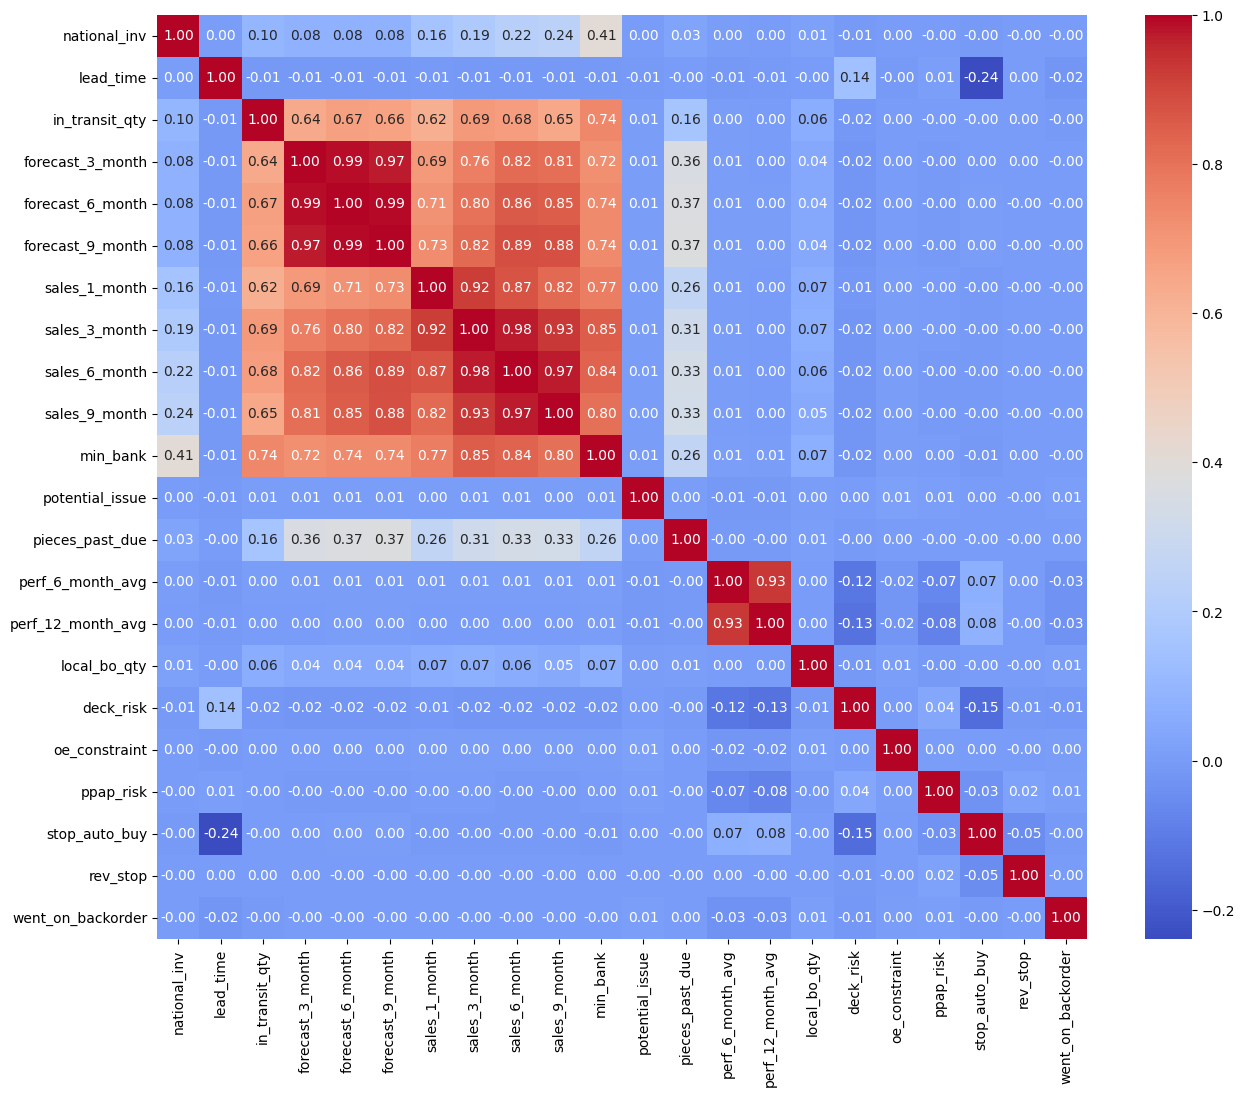

In [31]:
# Correlation Matrix
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt=".2f", annot=True, cmap="coolwarm")

In [32]:
# AS these features are Highly correlated to each other we can drop them
# ['forecast_6_month','forecast_9_month','sales_1_month','sales_6_month','pref_12_month_avg']

In [33]:
# choosing sample data randomly
sampled_df = df.sample(n=700000, random_state=20)

In [34]:
sampled_df.shape

(700000, 22)

In [35]:
sampled_df[num_col]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
885125,115.0,2.0,0.0,0.0,0.0,0.0,13.0,33.0,52.0,56.0,0.0,0.0,0.33,0.32,0.0
1029593,328.0,8.0,4.0,0.0,0.0,0.0,23.0,64.0,155.0,255.0,163.0,0.0,0.97,0.95,0.0
590597,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.58,0.58,0.0
1394041,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.79,0.0
140766,25.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,16.0,1.0,0.0,0.97,0.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654038,112.0,8.0,60.0,300.0,650.0,1075.0,93.0,413.0,463.0,463.0,44.0,0.0,0.93,0.93,0.0
782928,29.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.98,0.98,0.0
258152,290.0,9.0,3.0,0.0,0.0,0.0,20.0,87.0,203.0,271.0,23.0,0.0,0.99,0.98,0.0
20316,26.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,8.0,2.0,0.0,0.99,0.99,0.0


In [36]:
def scale_numerical_columns(df):
    scaler = StandardScaler()
    # Apply StandardScaler to these columns
    sampled_df[num_col] = scaler.fit_transform(sampled_df[num_col])

    return df, scaler

In [37]:
print("Original DataFrame:")
sampled_df.head()

Original DataFrame:


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
885125,115.0,2.0,0.0,0.0,0.0,0.0,13.0,33.0,52.0,56.0,0.0,0,0.0,0.33,0.32,0.0,1,0,0,1,0,0
1029593,328.0,8.0,4.0,0.0,0.0,0.0,23.0,64.0,155.0,255.0,163.0,0,0.0,0.97,0.95,0.0,0,0,0,1,0,0
590597,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.58,0.58,0.0,1,0,0,1,0,0
1394041,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.73,0.79,0.0,1,0,0,1,0,0
140766,25.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,16.0,1.0,0,0.0,0.97,0.98,0.0,0,0,0,0,0,0


In [38]:
# Scale the numerical columns
df_scaled, scaler = scale_numerical_columns(sampled_df)

In [39]:
# DataFrame after scaling
print("DataFrame with Scaled Numerical Columns:")
df_scaled

DataFrame with Scaled Numerical Columns:


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
885125,-0.012318,-0.860469,-0.031805,-0.034197,-0.035613,-0.036208,-0.025651,-0.027952,-0.031129,-0.032633,-0.041634,0,-0.008096,-2.000849,-2.070838,-0.017925,1,0,0,1,0,0
1029593,-0.005780,0.017336,-0.028889,-0.034197,-0.035613,-0.036208,-0.019474,-0.021806,-0.020022,-0.018735,0.085552,0,-0.008096,0.798909,0.760171,-0.017925,0,0,0,1,0,0
590597,-0.015541,0.602539,-0.031805,-0.034197,-0.035613,-0.036208,-0.033682,-0.034495,-0.036737,-0.036544,-0.040854,0,-0.008096,-0.907193,-0.902485,-0.017925,1,0,0,1,0,0
1394041,-0.015817,0.602539,-0.031805,-0.034197,-0.035613,-0.036208,-0.033682,-0.034495,-0.036737,-0.036544,-0.041634,0,-0.008096,-0.251000,0.041185,-0.017925,1,0,0,1,0,0
140766,-0.015080,-0.860469,-0.031805,-0.034197,-0.035613,-0.036208,-0.033064,-0.034297,-0.035443,-0.035426,-0.040854,0,-0.008096,0.798909,0.894981,-0.017925,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654038,-0.012410,0.017336,0.011945,0.022343,0.030789,0.040059,0.023766,0.047389,0.013192,-0.004209,-0.007302,0,-0.008096,0.623924,0.670298,-0.017925,0,0,0,1,0,0
782928,-0.014957,6.454572,-0.031805,-0.034197,-0.035613,-0.036208,-0.033682,-0.034495,-0.036737,-0.036544,-0.040074,0,-0.008096,0.842655,0.894981,-0.017925,1,0,0,0,0,0
258152,-0.006946,0.163637,-0.029618,-0.034197,-0.035613,-0.036208,-0.021327,-0.017246,-0.014846,-0.017618,-0.023688,0,-0.008096,0.886402,0.894981,-0.017925,0,0,0,1,0,0
20316,-0.015050,-0.860469,-0.031805,-0.034197,-0.035613,-0.036208,-0.033682,-0.033107,-0.035874,-0.035985,-0.040074,0,-0.008096,0.886402,0.939918,-0.017925,0,0,1,1,0,1


In [40]:
df_final = df_scaled.copy()

In [41]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix,RocCurveDisplay
from imblearn.over_sampling import SMOTE

In [42]:
# Selecting The Features And The Target Column
feature_columns = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_3_month',
                  'sales_9_month', 'min_bank', 'potential_issue',
                   'pieces_past_due', 'perf_6_month_avg',
                   'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk',
                   'stop_auto_buy', 'rev_stop']

X = df_final[feature_columns]
y = df_final['went_on_backorder']

In [43]:
# Balancing the Data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [44]:
X_resampled.shape

(1389804, 16)

In [45]:
y_resampled.shape

(1389804,)

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [47]:
# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# # Define the hyperparameter grid
# param_dist = {
#     'n_estimators': [int(x) for x in range(100, 1200, 100)],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [int(x) for x in range(10, 110, 10)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

In [48]:
# # Set up RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
#                                n_iter=25, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# # Get the best parameters
# best_params = rf.best_params_
# print(f"Best Parameters: {best_params}")

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    208294
           1       0.99      0.99      0.99    208648

    accuracy                           0.99    416942
   macro avg       0.99      0.99      0.99    416942
weighted avg       0.99      0.99      0.99    416942



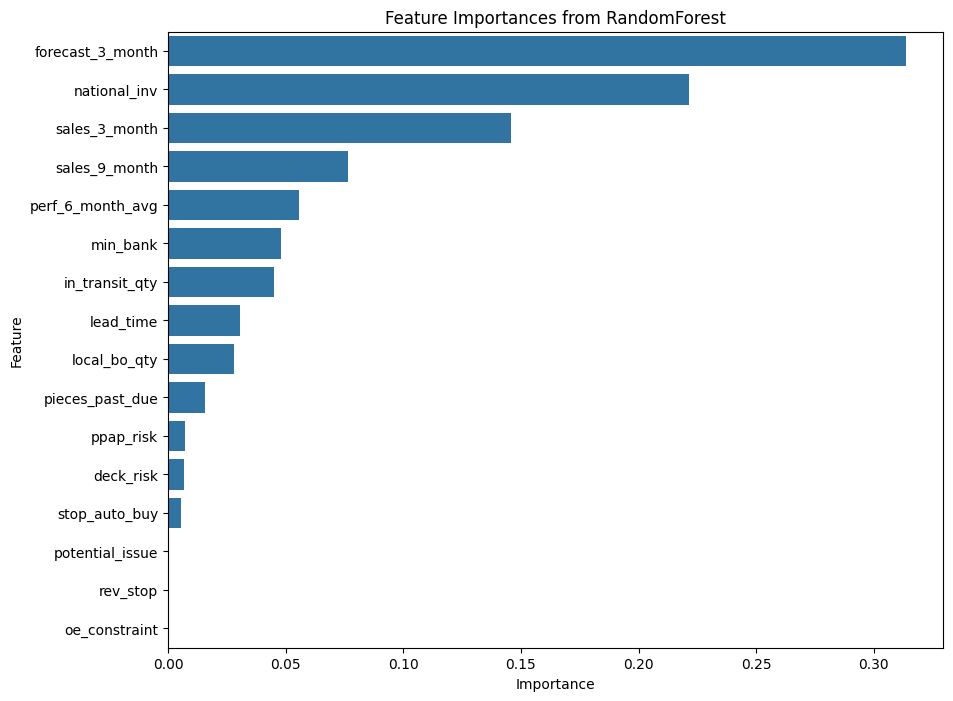

In [50]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from RandomForest')
plt.show()

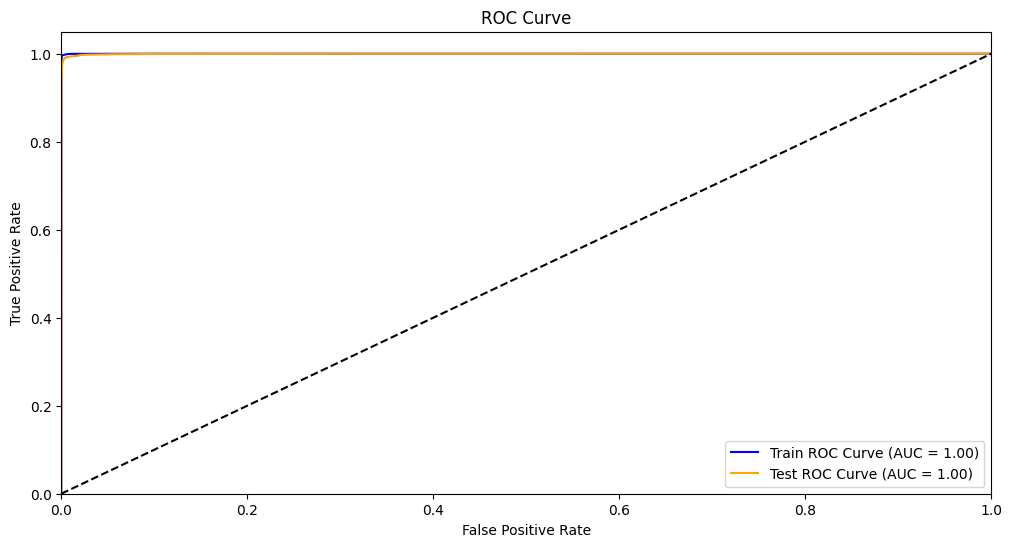

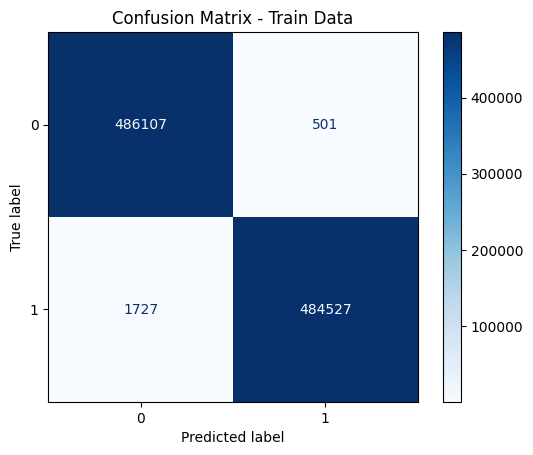

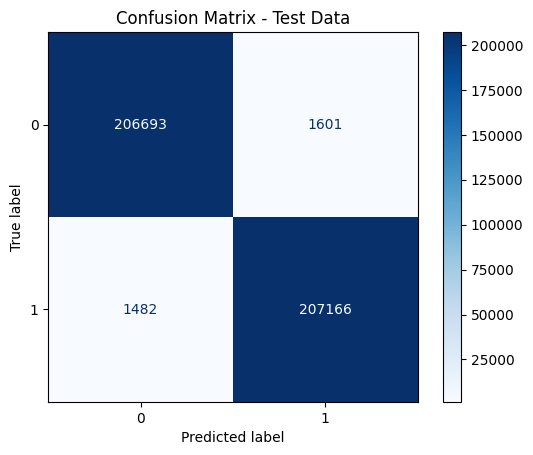

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming you've already split the data, trained your model, and have X_train, X_test, y_train, y_test

# Predict probabilities (for AUC-ROC)
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_prob = rf.predict_proba(X_test)[:, 1]

# Compute AUC-ROC scores
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {train_auc:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {test_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict labels (for Confusion Matrix)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for train data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Train Data')
plt.show()

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()


In [52]:
feature_names

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_3_month', 'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop'], dtype='object')

In [ ]:
# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 13 features
top_features = feature_importances.head(13)

# Display the top 13 features
print(top_features)

             Feature  Importance
3   forecast_3_month    0.313944
0       national_inv    0.232442
4      sales_3_month    0.138430
5      sales_9_month    0.076103
9   perf_6_month_avg    0.055565
6           min_bank    0.048873
2     in_transit_qty    0.041951
1          lead_time    0.031395
10      local_bo_qty    0.025237
8    pieces_past_due    0.017021
11         deck_risk    0.006865
13         ppap_risk    0.006809
14     stop_auto_buy    0.005145
